# 1 Exploratory Data Analysis

# 1.1 Introduction
After the data cleaning step where we put our data into a few standard formats.

When working with numerical data, some EDA techniques we can use include finding the average of the dataset, the distribution of the data, the most common values, etc. The idea is the same when working with text data.\
we are going to look at the following:
1. Most common words - find these and create word clouds
2. Size of vacabulary - look number of unique words and also how quickly some speeks
3. Amount of profanity - most common terms

## 1.2 Most Common Words

### 1.2.1 Analysis

In [11]:
# Read the document-term matrix
import pandas as pd
data = pd.read_pickle('data/dtm.pkl')

In [12]:
data = data.transpose() # you can do better across columns rather than rows
data.head()

,tom,anthony,bill,ali,ahir,ari,gabriel,nate,joe
soul,2,0,0,0,0,0,0,0,0
man,0,0,0,0,0,0,1,0,0
blues,0,0,0,0,0,0,0,0,1
brothers,0,0,0,0,3,0,0,0,0
plays,0,0,0,0,1,0,1,1,0


In [14]:
# find the top 10 words said by each comedians
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_dict[c] = list(top.items())

top_dict

{'tom': [('works', 303),
  ('repress', 247),
  ('cancer', 107),
  ('repeat', 99),
  ('doctor', 86),
  ('jewelry', 80),
  ('truly', 78),
  ('relationships', 69),
  ('rightfully', 53),
  ('reliant', 49)],
 'anthony': [('works', 146),
  ('cancer', 71),
  ('block', 59),
  ('relationships', 43),
  ('repeat', 41),
  ('wanted', 33),
  ('apathetic', 32),
  ('doctor', 29),
  ('twobedroom', 27),
  ('jewelry', 26)],
 'bill': [('jewelry', 112),
  ('repeat', 80),
  ('margaret', 78),
  ('truly', 78),
  ('doctor', 57),
  ('erectile', 49),
  ('relationships', 48),
  ('stds', 46),
  ('cowboy', 45),
  ('ryan', 42)],
 'ali': [('works', 192),
  ('repress', 152),
  ('repeat', 134),
  ('jewelry', 65),
  ('relationships', 64),
  ('truly', 44),
  ('doctor', 41),
  ('cowboy', 38),
  ('pessimistic', 34),
  ('lifetime', 33)],
 'ahir': [('las', 117),
  ('repeat', 113),
  ('truly', 61),
  ('cowboy', 46),
  ('pizzaordering', 44),
  ('jewelry', 41),
  ('wakeup', 33),
  ('wrapped', 32),
  ('margaret', 31),
  ('pinch'

In [15]:
# Print the top 15 words said by each comedian
for c, tp in top_dict.items():
    print(c)
    print(', '.join(word for word, count in tp[:14]))
    print('****')

tom
works, repress, cancer, repeat, doctor, jewelry, truly, relationships, rightfully, reliant
****
anthony
works, cancer, block, relationships, repeat, wanted, apathetic, doctor, twobedroom, jewelry
****
bill
jewelry, repeat, margaret, truly, doctor, erectile, relationships, stds, cowboy, ryan
****
ali
works, repress, repeat, jewelry, relationships, truly, doctor, cowboy, pessimistic, lifetime
****
ahir
las, repeat, truly, cowboy, pizzaordering, jewelry, wakeup, wrapped, margaret, pinch
****
ari
repeat, jewelry, doctor, relationships, consistency, truly, cancer, feedback, stds, cowboy
****
gabriel
works, cancer, relationships, repeat, jewelry, las, doctor, feedback, truly, cowboy
****
nate
repeat, jewelry, truly, doctor, relationships, seuss, pizzaordering, racism, halloween, cowboy
****
joe
works, cancer, repeat, relationships, doctor, stds, margaret, jewelry, truly, pizzaordering
****


**NOTE**: At this point, we could go on and create word clouds. However, by looking at these top words, you can see some of them have very little meaning and could be added to a stop words list, so let's just do that.

In [22]:
# Look at the most common top words 
# add them to the stop word list
from collections import Counter

# Let's first pull out the top 20 words for each comedians
words = []
for c in data.columns:
    top = [word for (word, count) in top_dict[c]]
    for t in top:
        words.append(t)

In [ ]:
words

In [24]:
# Let's aggregate this lis t and identify the most common words along with routines
Counter(words).most_common()

[('repeat', 9),
 ('jewelry', 9),
 ('doctor', 8),
 ('truly', 8),
 ('relationships', 8),
 ('cowboy', 6),
 ('works', 5),
 ('cancer', 5),
 ('margaret', 3),
 ('stds', 3),
 ('pizzaordering', 3),
 ('repress', 2),
 ('las', 2),
 ('feedback', 2),
 ('rightfully', 1),
 ('reliant', 1),
 ('block', 1),
 ('wanted', 1),
 ('apathetic', 1),
 ('twobedroom', 1),
 ('erectile', 1),
 ('ryan', 1),
 ('pessimistic', 1),
 ('lifetime', 1),
 ('wakeup', 1),
 ('wrapped', 1),
 ('pinch', 1),
 ('consistency', 1),
 ('seuss', 1),
 ('racism', 1),
 ('halloween', 1)]

In [27]:
# If more than half of the comedians have it as a top words
add_stop_words = [word for word, count in Counter(words).most_common() if count >3]
add_stop_words

['repeat',
 'jewelry',
 'doctor',
 'truly',
 'relationships',
 'cowboy',
 'works',
 'cancer']

In [34]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Read in cleaned data
data_clean = pd.read_pickle('data/data_clean.pkl')

stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate document-term matrix with the new list of stop words
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray())
data_stop.index = data_clean.index
data_stop.columns = cv.get_feature_names_out()

In [35]:
# Pickle it for later use
import pickle
data_stop.to_pickle('data/dtm_stop.pkl')
with open('data/cv.pkl', 'wb') as file:
    pickle.dump(cv, file)

In [36]:
data_stop

,ab,abc,abducted,abiding,ability,able,abled,abortion,abracadabra,abs,...,zam,zero,zeroing,zeyde,zim,zipped,zippers,zookeeper,zoom,zuko
tom,2,0,0,0,0,1,0,0,0,7,...,3,0,0,0,5,0,0,0,0,0
anthony,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
bill,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
ali,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
ahir,0,0,0,3,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ari,0,0,0,0,0,2,0,0,0,0,...,0,3,0,5,0,0,0,0,0,0
gabriel,0,1,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nate,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
joe,0,0,1,0,0,0,0,0,1,0,...,0,3,0,0,0,0,0,0,1,0


Install the `wordcloud` library from Anaconda prompt:
```shell
conda install -c conda-forge wordcloud
```

In [37]:
from wordcloud import WordCloud
wc = WordCloud(stop_words, background_color='white', colormap='Dark2',
               max_font_size = 150, random_state=42)

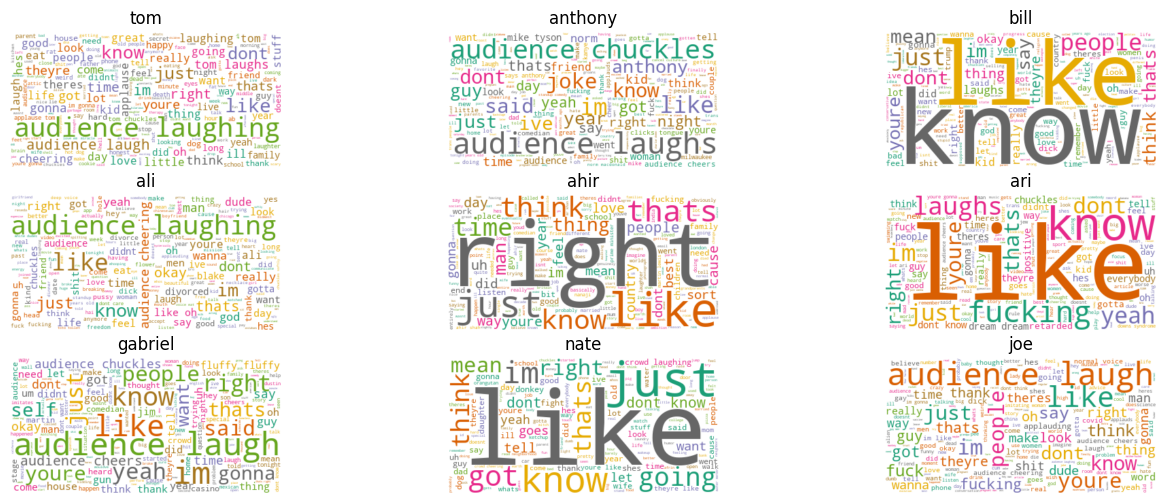

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize= (16,6))

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3,3, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(data_clean.index[index])

plt.show()

## 1.3 Number of Words

### 1.3.1 Analysis

In [75]:
# Find the number of unique words that each comedian uses
# Identify the non-zero items in the DTM 
unique_list = []
for c in data.columns:
    uniques = len(data[data[c] != 0][c])
    unique_list.append(uniques)

In [80]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,anthony,1021
7,nate,1040
0,tom,1406
3,ali,1418
8,joe,1567
5,ari,1575
2,bill,1738
6,gabriel,1786
4,ahir,1826


In [82]:
# Calculate the words per minute of each comedian

# Find the total number of words tha a comedian uses
total_list = []
for c in data.columns:
    totals = sum(data[c])
    total_list.append(totals)


# Comedy special run times from IMDB, in minutes
run_times = [62, 51, 66, 59, 61, 75, 101, 63, 67]

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['wpm'] = data_words['total_words']/ data_words['run_times']

# Sort the dataframe by WPM
data_wpm_sort = data_words.sort_values(by='wpm')
data_wpm_sort

,comedian,unique_words,total_words,run_times,wpm
7,nate,1040,3266,63,51.841270
1,anthony,1021,2900,51,56.862745
3,ali,1418,3746,59,63.491525
6,gabriel,1786,6696,101,66.297030
2,bill,1738,4447,66,67.378788
5,ari,1575,5720,75,76.266667
0,tom,1406,4851,62,78.241935
8,joe,1567,5277,67,78.761194
4,ahir,1826,4929,61,80.803279


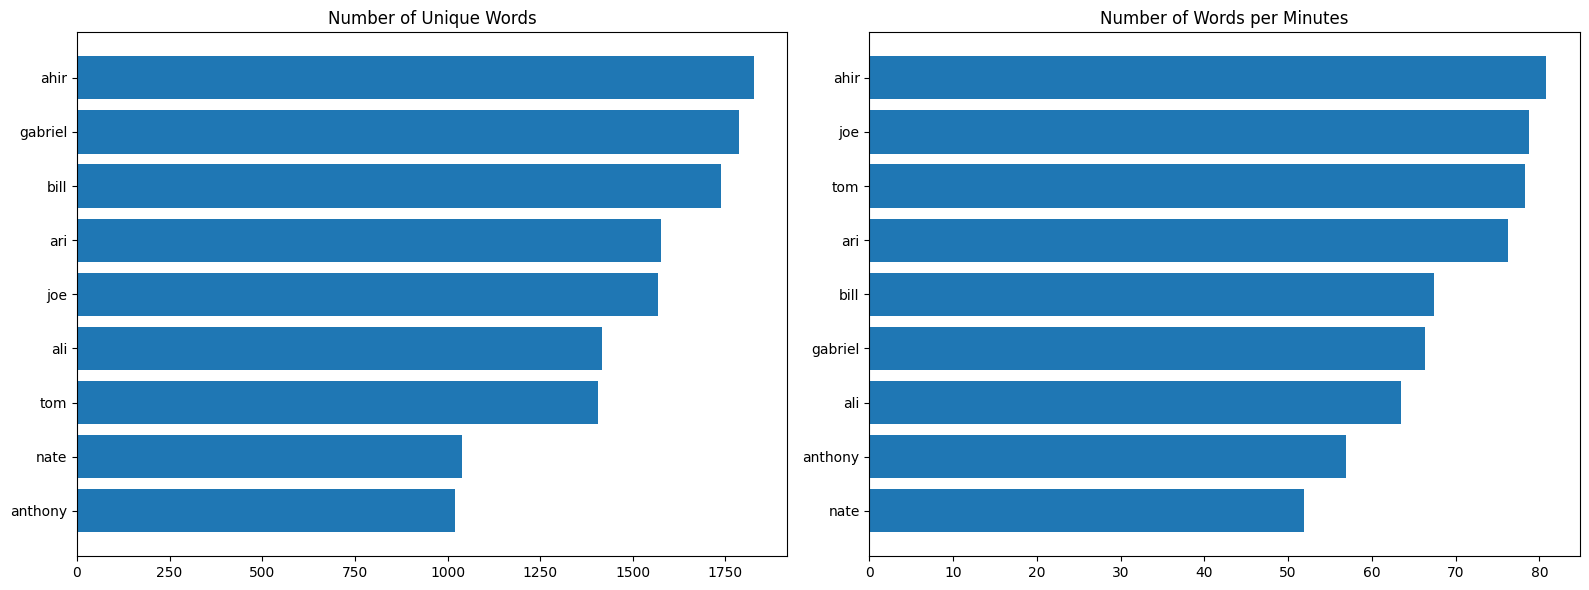

In [85]:
# Let's plot our finding
import numpy as np
y = np.arange(len(data_words))
plt.subplot(1,2,1)
plt.barh(y, data_unique_sort.unique_words, align='center')
plt.yticks(y, data_unique_sort.comedian)
plt.title('Number of Unique Words')

plt.subplot(1,2,2)
plt.barh(y, data_wpm_sort.wpm, align='center')
plt.yticks(y, data_wpm_sort.comedian)
plt.title('Number of Words per Minutes')

plt.tight_layout()
plt.show()

### 1.3.2 Findings
* Vocabulary
  - Ahir and Gabriel use alot of words in their comedy.
  - Nate and Anthony have smaller vacabulary.
* Talking Speed
  - Ahir and Joe talk fast.
  - Anthony and Nate talk slow.

In [104]:
data

,tom,anthony,bill,ali,ahir,ari,gabriel,nate,joe
soul,2,0,0,0,0,0,0,0,0
man,0,0,0,0,0,0,1,0,0
blues,0,0,0,0,0,0,0,0,1
brothers,0,0,0,0,3,0,0,0,0
plays,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
guessing,0,0,0,0,0,0,0,1,0
shlazool,0,0,0,0,0,0,0,1,0
nut,0,0,0,0,0,0,0,1,0
stalin,0,0,0,1,0,0,0,0,1
